[Accueil](../../index.ipynb) > [Sommaire Première](../index.ipynb)

Ce TP est une application pratique du cours sur l'[algorithme des plus proches voisins](../8_Algorithmique/3_k_plus_proches_voisins.ipynb)

Ecrire une fonction *get_titanic_datas* qui récupère les données de l'url https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv et retourne une datframe de type panda.

Ourir ces données dans une tableur pour observer plus facilement les données

In [50]:
import pandas as pd # data processing
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

#train['Sex'] = train['Sex'].replace(['male'], 0)
#train['Sex'] = train['Sex'].replace(['female'], 1)
#train['Survived'] = train['Survived'].replace([0], 10)
#train['Survived'] = train['Survived'].replace([1], 20)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


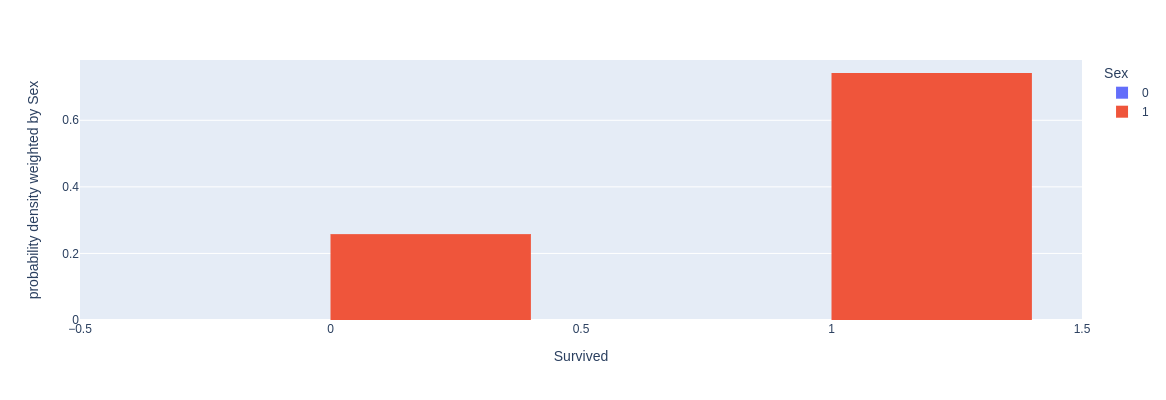

In [46]:
import plotly.express as px
df = train
fig = px.histogram(df, y="Sex", x="Survived", barmode='group', height=400, color='Sex', histnorm='probability density')
fig.show()

In [9]:
correlation_matrix = train.corr()
correlation_matrix['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

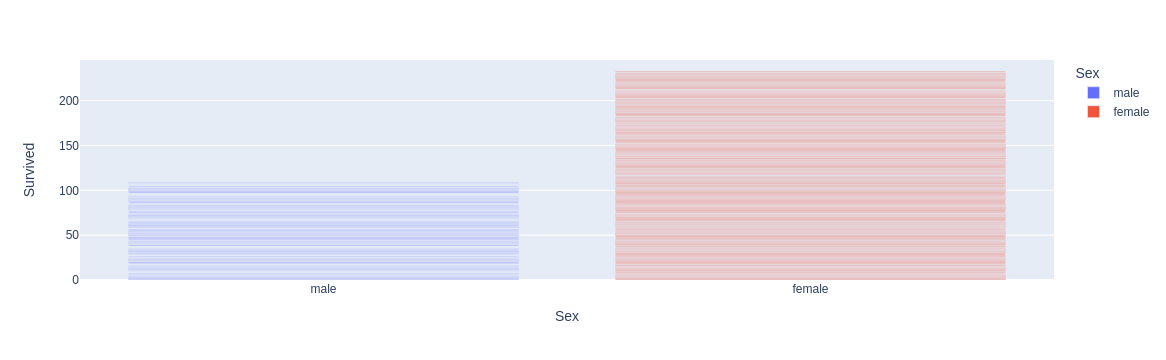

In [26]:
import plotly.express as px
fig = px.bar(train, x='Sex', y='Survived', color='Sex')
#fig = px.pie(train, values='Survived', names='Sex', title='Population of European continent', histnorm='percent')

fig.show()

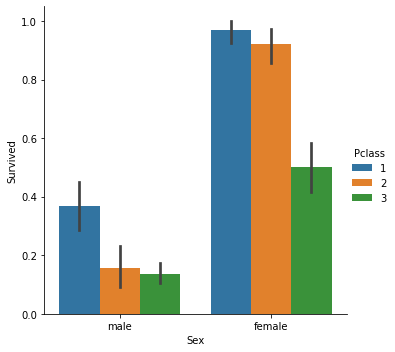

In [55]:
import seaborn
plot = seaborn.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train)
plot

Observer les données et éliminer les colonnes qui selon vous n'ont pas d'importance sur la survie d'une passager.

- https://pixees.fr/informatiquelycee/n_site/nsi_prem_projet_titanic.html
- https://www.kaggle.com/competitions/titanic/data?select=test.csv
- https://medium.com/analytics-vidhya/titanic-machine-learning-by-k-nearest-neighbors-knn-algorithm-530d8bdd8323
- https://github.com/awesomedata/awesome-public-datasets/issues/351